In [2]:
!pip install mysql-connector-python

In [3]:
import mysql.connector

In [4]:
# Create a connection
mydb = mysql.connector.connect(user = 'root',
                               password = 'root',
                               host = 'localhost')

In [5]:
# Create a cursor object
mycursor = mydb.cursor()

In [6]:
mycursor.execute('CREATE DATABASE demodatabase')

In [7]:
mycursor.execute('SHOW DATABASES')

In [8]:
for db in mycursor:
    print(db)

('classicmodels',)
('demo1',)
('demo11',)
('demo2',)
('demodatabase',)
('employees',)
('information_schema',)
('mydb',)
('mysql',)
('org',)
('organisation',)
('performance_schema',)
('retail',)
('sakila',)
('sys',)
('testdb',)
('world',)


In [10]:
mycursor.execute('DROP DATABASE demodatabase')
mycursor.execute('SHOW DATABASES')
for db in mycursor:
    print(db)

('classicmodels',)
('demo1',)
('demo11',)
('demo2',)
('employees',)
('information_schema',)
('mydb',)
('mysql',)
('org',)
('organisation',)
('performance_schema',)
('retail',)
('sakila',)
('sys',)
('world',)


In [11]:
mycursor.execute('CREATE DATABASE testdb')

In [12]:
# To comit the changes and close the connection
mydb.commit()
mydb.close()

In [13]:
# Making connection with a database
testdb_connector = mysql.connector.connect(user = 'root',
                                           password = 'root',
                                           host = 'localhost',
                                           database = 'testdb')

mycursor = testdb_connector.cursor()

In [14]:
mycursor.execute('SHOW TABLES')
for table in mycursor:
    print(table)

In [15]:
query = '''CREATE TABLE employee(
                                 empid INT PRIMARY KEY,
                                 name VARCHAR(100) NOT NULL,
                                 age INT,
                                 city VARCHAR(100))'''

mycursor.execute(query)

In [16]:
mycursor.execute('SHOW TABLES')
for table in mycursor:
    print(table)

('employee',)


In [43]:
testdb_connector.commit()
testdb_connector.close()

In [44]:
# Connecting with database testdb again
testdb_connector = mysql.connector.connect(user = 'root',
                                           password = 'root',
                                           host = 'localhost',
                                           database = 'testdb')

mycursor = testdb_connector.cursor()

In [45]:
mycursor.execute('DESC employee')
for i in mycursor:
    print(i)

('empid', b'int(11)', 'NO', 'PRI', None, '')
('name', b'varchar(100)', 'NO', '', None, '')
('age', b'int(11)', 'YES', '', None, '')
('city', b'varchar(100)', 'YES', '', None, '')


In [46]:
mycursor.execute('SELECT * FROM employee')
for row in mycursor:
    print(row)

In [47]:
query = '''INSERT INTO employee (empid, name, age, city)
           VALUES (%s, %s, %s, %s)'''
val = (101, 'Ankit', 32, 'Kolkata')

mycursor.execute(query, val)

In [48]:
mycursor.execute('SELECT * FROM employee')
for row in mycursor:
    print(row)

(101, 'Ankit', 32, 'Kolkata')


In [49]:
emp_id = int(input('Enter the employee id : '))
name = input('Enter the name : ')
age = int(input('Enter the age : '))
city = input('ENter the city : ')

query = '''INSERT INTO employee (empid, name, age, city)
           VALUES (%s, %s, %s, %s)'''

val = (emp_id, name, age , city)
mycursor.execute(query, val)

Enter the employee id : 102
Enter the name : Gayatri
Enter the age : 45
ENter the city : Pune


In [50]:
mycursor.execute('SELECT * FROM employee')
for row in mycursor:
    print(row)

(101, 'Ankit', 32, 'Kolkata')
(102, 'Gayatri', 45, 'Pune')


In [51]:
query = '''INSERT INTO employee (empid, name, age, city)
           VALUES (%s, %s, %s, %s)'''

val = [(103, 'Ankita', 25, 'Pune'),
       (104, 'Tanya', 24, 'Panipat'),
       (105, 'Aniket', 35, 'Delhi'),
       (106, 'Aparna', 38, 'Pune')]

mycursor.executemany(query, val)

In [52]:
mycursor.execute('SELECT * FROM employee')
for row in mycursor:
    print(row)

(101, 'Ankit', 32, 'Kolkata')
(102, 'Gayatri', 45, 'Pune')
(103, 'Ankita', 25, 'Pune')
(104, 'Tanya', 24, 'Panipat')
(105, 'Aniket', 35, 'Delhi')
(106, 'Aparna', 38, 'Pune')


In [53]:
mycursor.execute('SELECT * FROM employee WHERE age > 25')
for row in mycursor:
    print(row)

(101, 'Ankit', 32, 'Kolkata')
(102, 'Gayatri', 45, 'Pune')
(105, 'Aniket', 35, 'Delhi')
(106, 'Aparna', 38, 'Pune')


In [54]:
mycursor.execute('SELECT * FROM employee WHERE age > 25 and city = "Pune"')
for row in mycursor:
    print(row)

(102, 'Gayatri', 45, 'Pune')
(106, 'Aparna', 38, 'Pune')


In [55]:
testdb_connector.commit()
testdb_connector.close()

---
---

In [56]:
# Connecting with database demo1
db_connector = mysql.connector.connect(user = 'root',
                                           password = 'root',
                                           host = 'localhost',
                                           database = 'demo1')

mycursor = db_connector.cursor()

In [58]:
mycursor.execute('SHOW TABLES')
for table in mycursor:            # Output can also be observed by list(mycursor)
    print(table)

('department',)
('employee',)
('employee2',)
('male_employees',)


In [59]:
mycursor.execute('SELECT * FROM employee')
for row in mycursor:
    print(row)

(101, 'Akshita', 'BC', 'F', 'Delhi', 60000, 'Marketing')
(102, 'Ankit', 'Das', 'M', 'Kolkata', 80000, 'Finance')
(103, 'Ankita', 'Gangurde', 'F', 'Pune', 75000, 'Engineering')
(104, 'Ankur', 'Varshney', 'M', 'Gaziabad', 90000, 'Research')
(105, 'Utkarsh', 'Sharma', 'M', 'Jaipur', 400000, 'Research')
(106, 'Madhu', 'Bagri', 'F', 'Mumbai', 82000, 'Engineering')
(107, 'Mahtab', 'Alam', 'M', 'Hyderabad', 85000, 'Marketing')
(108, 'Tanya', 'Bajaj', 'F', 'Panipat', 80000, 'HR')
(109, 'Tarun', 'Shah', 'M', 'Jaipur', 75000, 'Finance')
(110, 'Rishabh', 'Sharma', 'M', 'Indore', 60000, 'HR')
(111, 'Rupa', 'Datta', 'F', 'Pune', 750000, 'Marketing')
(112, 'Uma', 'Dev', 'F', 'Hyderabad', 50000, 'Finance')
(113, 'Kumar', 'Sharma', 'M', 'Mumbai', 60000, 'Marketing')
(114, 'Naresh', 'Avasthi', 'M', 'Pune', 750000, 'Finance')
(115, 'Paul', 'Dave', 'M', 'Pune', 750000, 'Engineering')
(116, 'Kim', 'Yan', 'F', 'Mumbai', 30770, 'Marketing')
(117, 'Sam', 'Das', 'M', 'Jaipur', 22000, 'Management')
(118, 'Omy'

In [64]:
mycursor.execute('DESC employee')
for i in mycursor:
    print(i)

('empid', b'int(11)', 'NO', 'PRI', None, '')
('fname', b'varchar(50)', 'NO', '', None, '')
('lname', b'varchar(50)', 'YES', '', None, '')
('gender', b'char(1)', 'YES', '', None, '')
('city', b'varchar(100)', 'YES', '', b'Jaipur', '')
('salary', b'int(11)', 'YES', '', None, '')
('department', b'varchar(50)', 'YES', '', None, '')


In [68]:
mycursor.execute('DESC employee2')
for i in mycursor:
    print(i)

('empid', b'int(11)', 'NO', 'PRI', None, '')
('empname', b'varchar(100)', 'YES', '', None, '')
('empage', b'int(11)', 'YES', '', None, '')
('deptid', b'int(11)', 'YES', '', None, '')
('salary', b'int(11)', 'YES', '', None, '')


In [67]:
mycursor.execute('DESC department')
for i in mycursor:
    print(i)

('deptid', b'int(11)', 'YES', '', None, '')
('deptname', b'varchar(100)', 'YES', '', None, '')
('HOD', b'varchar(100)', 'YES', '', None, '')


In [60]:
mycursor.execute('SELECT * FROM department')
for row in mycursor:
    print(row)

(101, 'Marketing', 'Abhijeet')
(102, 'Sales', 'Byju Ravindran')
(103, 'Research', 'Srinivas')
(104, 'Engineering', 'Muttuswamy')
(105, 'HR', 'Srivalli')


In [61]:
# Extract all employees having salary between 80000 to 140000
query = '''SELECT * FROM employee
           WHERE salary BETWEEN 80000 and 140000'''
mycursor.execute(query)
for row in mycursor:
    print(row)

(102, 'Ankit', 'Das', 'M', 'Kolkata', 80000, 'Finance')
(104, 'Ankur', 'Varshney', 'M', 'Gaziabad', 90000, 'Research')
(106, 'Madhu', 'Bagri', 'F', 'Mumbai', 82000, 'Engineering')
(107, 'Mahtab', 'Alam', 'M', 'Hyderabad', 85000, 'Marketing')
(108, 'Tanya', 'Bajaj', 'F', 'Panipat', 80000, 'HR')
(123, 'Govind', 'Chandak', 'M', 'Balasore', 80000, 'Engineering')
(125, 'Bharat', 'Bag', 'M', 'Bangalore', 100000, 'Sales')
(128, 'Shivangi', 'Shreya', 'F', 'Ranchi', 80000, 'Engineering')
(130, 'Dayanidhi', 'Dahima', 'M', 'Delhi', 90000, 'Sales')


In [63]:
# Extract average salaries in each city in descending order
query = '''SELECT city, AVG(salary) as avg_salary FROM employee
           GROUP BY city
           ORDER BY avg_salary DESC'''
mycursor.execute(query)
for row in mycursor:
    print(row)

('Pune', Decimal('469000.0000'))
('Jaipur', Decimal('165666.6667'))
('Kanpur', Decimal('150000.0000'))
('Gaziabad', Decimal('90000.0000'))
('Bangalore', Decimal('80000.0000'))
('Balasore', Decimal('80000.0000'))
('Ranchi', Decimal('80000.0000'))
('Panipat', Decimal('80000.0000'))
('Delhi', Decimal('67500.0000'))
('Hyderabad', Decimal('65000.0000'))
('Kolkata', Decimal('60000.0000'))
('Indore', Decimal('60000.0000'))
('Jamshedpur', Decimal('50000.0000'))
('Mumbai', Decimal('49255.0000'))
('Sangali', Decimal('45000.0000'))
('Indapur', Decimal('35000.0000'))
('Baramati', Decimal('30000.0000'))
('Solapur', Decimal('25000.0000'))


In [66]:
# Extract empid, fname, lname, salary of all employees having salary greater than the average salary
query = '''SELECT empid,fname,lname,salary FROM employee
           WHERE salary > (SELECT AVG(salary) FROM employee)
           ORDER BY salary DESC'''
mycursor.execute(query)
for row in mycursor:
    print(row)

(111, 'Rupa', 'Datta', 750000)
(114, 'Naresh', 'Avasthi', 750000)
(115, 'Paul', 'Dave', 750000)
(105, 'Utkarsh', 'Sharma', 400000)
(119, 'Tom', 'Fox', 150000)


In [72]:
# Extract empid, empname, salary, deptid, deptname, HOD from database demo1
query = '''SELECT employee2.empid, employee2.empname, employee2.salary, employee2.deptid,
           department.deptid, department.deptname, department.HOD
           FROM employee2 LEFT JOIN department
           ON employee2.deptid = department.deptid'''
mycursor.execute(query)
for row in mycursor:
    print(row)

(1, 'Aman', 100000, 101, 101, 'Marketing', 'Abhijeet')
(4, 'Bhuvan', 120000, 101, 101, 'Marketing', 'Abhijeet')
(3, 'Vishal', 90000, 103, 103, 'Research', 'Srinivas')
(5, 'Geetha', 130000, 103, 103, 'Research', 'Srinivas')
(2, 'Anand', 110000, 104, 104, 'Engineering', 'Muttuswamy')
(6, 'Shalini', 80000, 104, 104, 'Engineering', 'Muttuswamy')
(7, 'Shyam', 80000, 106, None, None, None)
(8, 'Shubham', 60000, 107, None, None, None)


In [73]:
# Extract empid, empname, salary, deptid, deptname, HOD from database demo1
query = '''SELECT employee2.empid, employee2.empname, employee2.salary, employee2.deptid,
           department.deptid, department.deptname, department.HOD
           FROM employee2 LEFT JOIN department
           ON employee2.deptid = department.deptid
           UNION
           SELECT employee2.empid, employee2.empname, employee2.salary, employee2.deptid,
           department.deptid, department.deptname, department.HOD
           FROM employee2 RIGHT JOIN department
           ON employee2.deptid = department.deptid'''
mycursor.execute(query)
for row in mycursor:
    print(row)

(1, 'Aman', 100000, 101, 101, 'Marketing', 'Abhijeet')
(4, 'Bhuvan', 120000, 101, 101, 'Marketing', 'Abhijeet')
(3, 'Vishal', 90000, 103, 103, 'Research', 'Srinivas')
(5, 'Geetha', 130000, 103, 103, 'Research', 'Srinivas')
(2, 'Anand', 110000, 104, 104, 'Engineering', 'Muttuswamy')
(6, 'Shalini', 80000, 104, 104, 'Engineering', 'Muttuswamy')
(7, 'Shyam', 80000, 106, None, None, None)
(8, 'Shubham', 60000, 107, None, None, None)
(None, None, None, None, 102, 'Sales', 'Byju Ravindran')
(None, None, None, None, 105, 'HR', 'Srivalli')


In [74]:
db_connector.commit()
db_connector.close()

---
---

# Reading SQL query results using pandas

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

%matplotlib inline

In [76]:
db_connector = mysql.connector.connect(user = 'root',
                                           password = 'root',
                                           host = 'localhost',
                                           database = 'demo1')

mycursor = db_connector.cursor()

In [77]:
query = 'SELECT * FROM employee'
df = pd.read_sql(query, db_connector)
df

empid      fname      lname gender        city  salary   department
0     101    Akshita         BC      F       Delhi   60000    Marketing
1     102      Ankit        Das      M     Kolkata   80000      Finance
2     103     Ankita   Gangurde      F        Pune   75000  Engineering
3     104      Ankur   Varshney      M    Gaziabad   90000     Research
4     105    Utkarsh     Sharma      M      Jaipur  400000     Research
5     106      Madhu      Bagri      F      Mumbai   82000  Engineering
6     107     Mahtab       Alam      M   Hyderabad   85000    Marketing
7     108      Tanya      Bajaj      F     Panipat   80000           HR
8     109      Tarun       Shah      M      Jaipur   75000      Finance
9     110    Rishabh     Sharma      M      Indore   60000           HR
10    111       Rupa      Datta      F        Pune  750000    Marketing
11    112        Uma        Dev      F   Hyderabad   50000      Finance
12    113      Kumar     Sharma      M      Mumbai   60000    Marketing
13    114     Naresh    Avasthi      M        Pune  750000      Finance
14    115       Paul       Dave      M        Pune  750000  Engineering
15    116        Kim        Yan      F      Mumbai   30770    Marketing
16    117        Sam        Das      M      Jaipur   22000   Management
17    118        Omy       Shah      F       Delhi   45000      Finance
18    119        Tom        Fox      M      Kanpur  150000      Finance
19    120        Jon        Cox      M      Mumbai   24250           HR
20    121      Madhu         BG      F   Bangalore   60000          R&D
21    122      Kirti     Binani      F     Kolkata   55000      Finance
22    123     Govind    Chandak      M    Balasore   80000  Engineering
23    124      Suman         Ch      F     Kolkata   45000   Accounting
24    125     Bharat        Bag      M   Bangalore  100000        Sales
25    126   Abhishek      Kumar      M   Hyderabad   60000    Marketing
26    127     Mayank     Sharma      M       Delhi   75000   Accounting
27    128   Shivangi     Shreya      F      Ranchi   80000  Engineering
28    129      Rahul  Bhalotiya      M  Jamshedpur   50000  Engineering
29    130  Dayanidhi     Dahima      M       Delhi   90000        Sales
30    131    Avadhut     Madane      M        Pune   20000      Finance
31    132      Rahul     Kokare      M    Baramati   30000   Accounting
32    133      Suhas     Zunjar      M     Indapur   35000    Marketing
33    134     Sanjay    Tangade      M     Solapur   25000           HR
34    135      Vijay     Kokare      M     Sangali   45000          R&D

In [79]:
df.salary.mean()

130543.42857142857

C:\Users\Utkarsh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='department', ylabel='salary'>

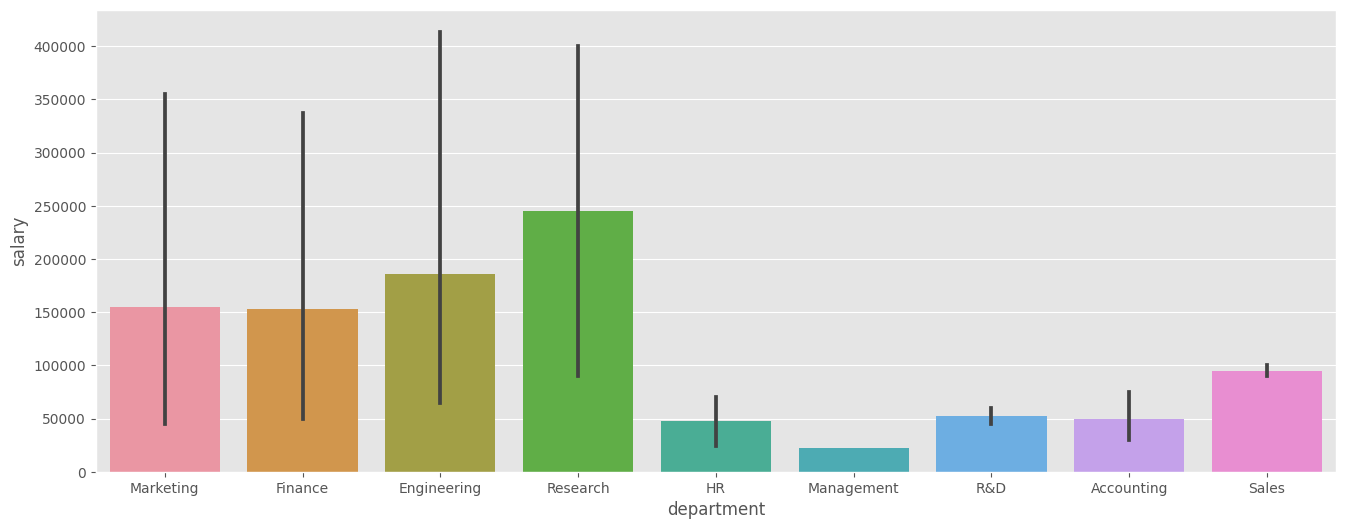

In [86]:
plt.figure(figsize = (16,6))
sns.barplot('department', 'salary', data = df)

C:\Users\Utkarsh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='salary'>

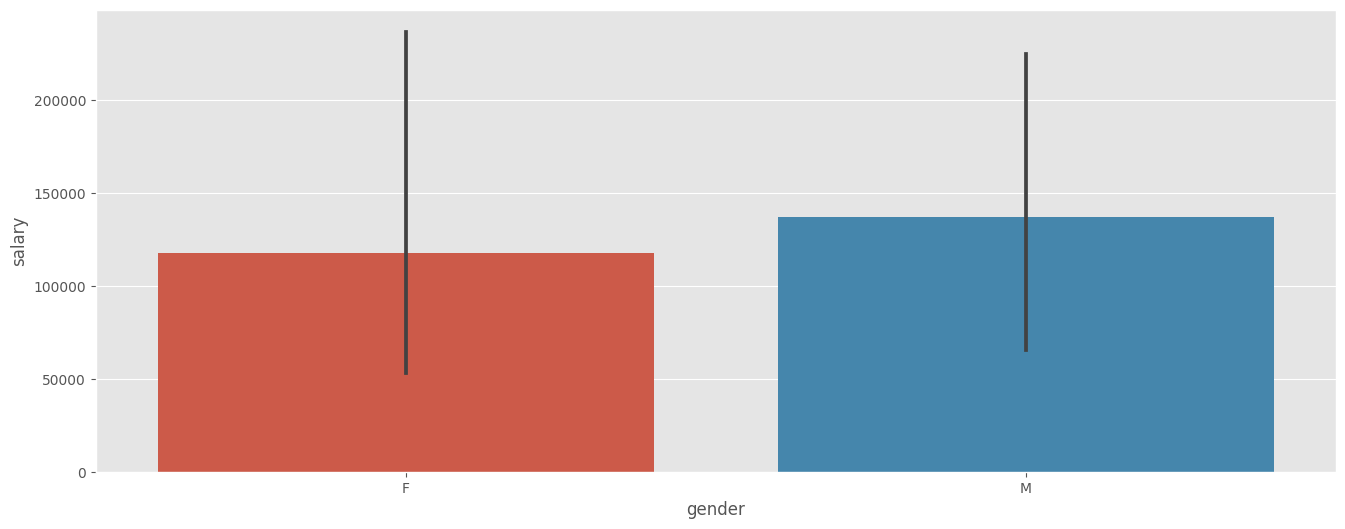

In [87]:
plt.figure(figsize = (16,6))
sns.barplot('gender', 'salary', data = df)

C:\Users\Utkarsh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='department', ylabel='salary'>

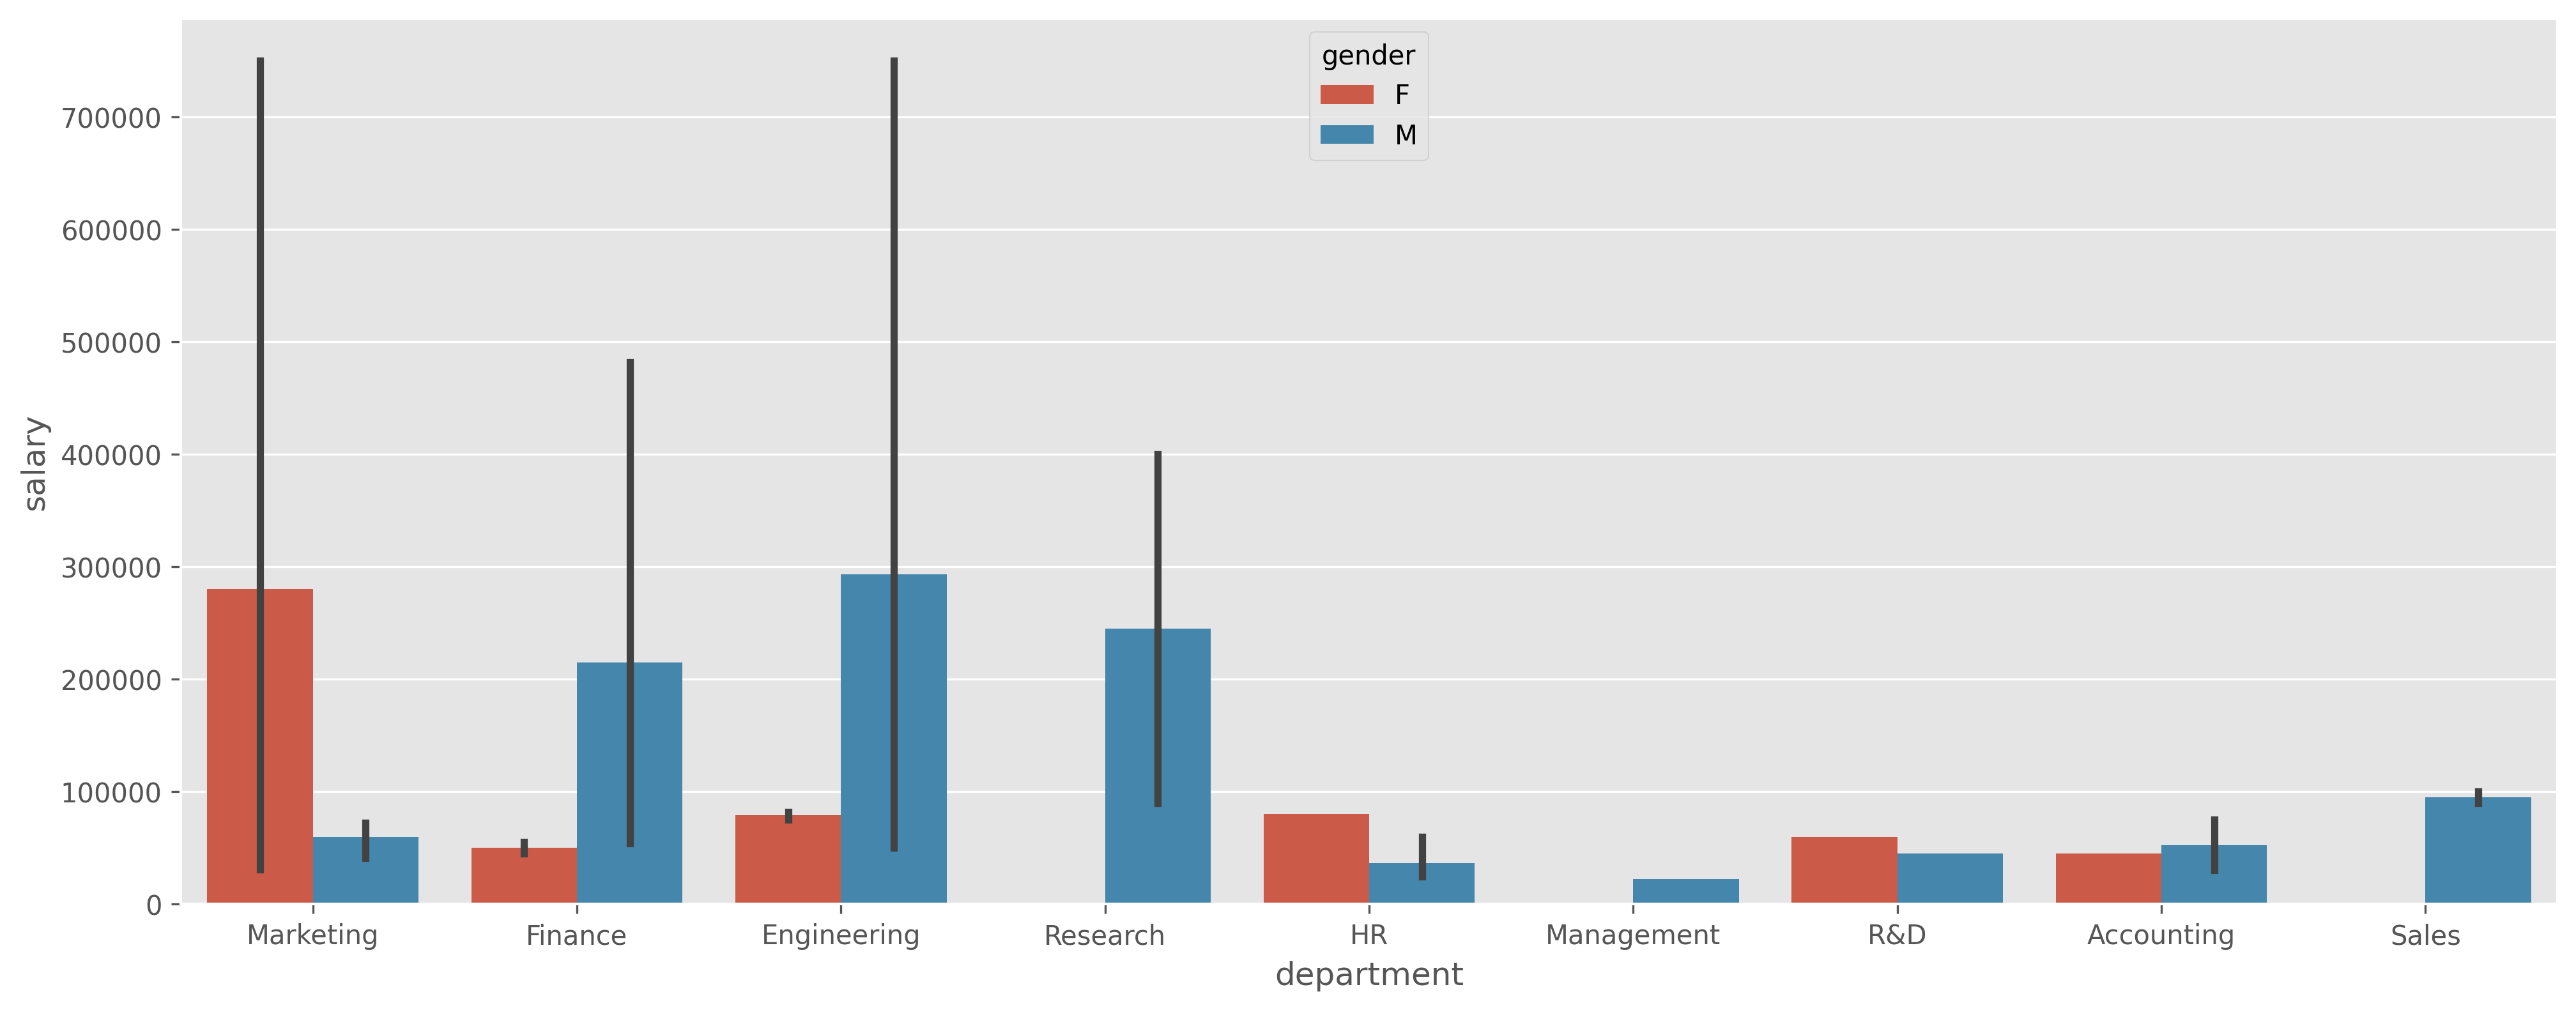

In [89]:
plt.figure(figsize = (16,6), dpi = 300)
sns.barplot('department', 'salary', hue = 'gender', data = df)